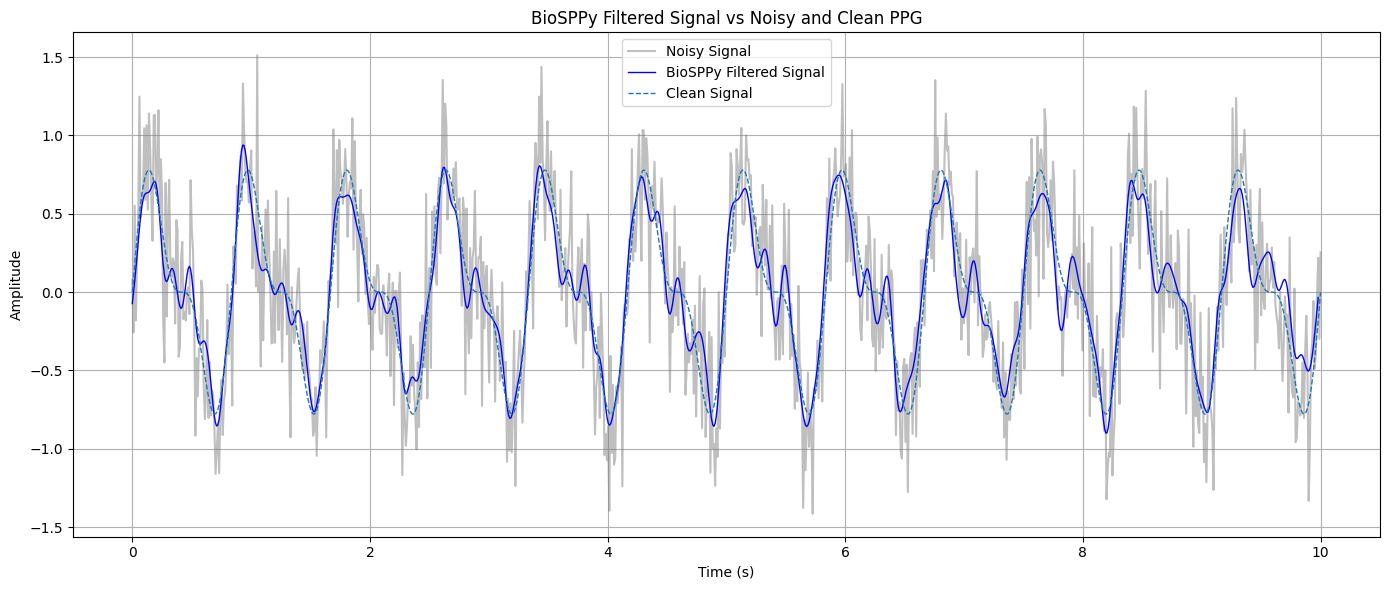


MSE Comparison (BioSPPy Filter):
BioSPPy Filter vs Clean Signal: MSE = 0.019393


In [2]:
# PPG Signal Filtering and Evaluation using BioSPPy

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from biosppy.signals import ppg
from sklearn.metrics import mean_squared_error

# Sampling rate and time axis
fs = 100  # Hz
t = np.linspace(0, 10, fs * 10)  # 10-second signal

# Generate clean synthetic PPG signal
ppg_clean = 0.6 * np.sin(2 * np.pi * 1.2 * t) + 0.3 * np.sin(2 * np.pi * 2.4 * t)
noise = 0.3 * np.random.randn(len(t))
ppg_noisy = ppg_clean + noise

# BioSPPy provides a full processing pipeline for PPG signals:
# - Bandpass filtering: [0.5, 5] Hz default using Butterworth
# - Peak detection: systolic peaks
# - Interbeat interval (IBI) extraction
# - Signal segmentation
# - Return includes filtered signal and detected peaks

# Apply biosppy PPG processing pipeline
template = ppg.ppg(signal=ppg_noisy, sampling_rate=fs, show=False)

# Extract filtered signal from output
ppg_filtered = template['filtered']
filtered_time = template['ts']

# Plotting BioSPPy Filtered Signal vs Clean and Noisy
plt.figure(figsize=(14, 6))
plt.plot(t, ppg_noisy, label='Noisy Signal', color='gray', alpha=0.5)
plt.plot(filtered_time, ppg_filtered, label='BioSPPy Filtered Signal', color='blue', linewidth=1)
plt.plot(t, ppg_clean, label='Clean Signal', linestyle='--', linewidth=1)
plt.legend()
plt.title('BioSPPy Filtered Signal vs Noisy and Clean PPG')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()

# Evaluation with Mean Squared Error (MSE)
# Resize clean signal to match filtered signal length (if needed)
ppg_clean_resampled = np.interp(filtered_time, t, ppg_clean)
mse_biosppy = mean_squared_error(ppg_clean_resampled, ppg_filtered)

print("\nMSE Comparison (BioSPPy Filter):")
print(f"BioSPPy Filter vs Clean Signal: MSE = {mse_biosppy:.6f}")

# Notes on BioSPPy Filtering:
# BioSPPy uses a second-order Butterworth bandpass filter by default
# with cutoff frequencies [0.5 Hz, 5 Hz] for PPG.
# Filtering is done using forward-backward filtering for zero phase distortion.
# This is followed by a moving average smoother to reduce residual noise.
# Output includes time stamps (`ts`), filtered signal, peaks, and heart rate metrics.
# See biosppy/signals/ppg.py → _ppg() and ppg() methods for details.